# Importing The Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Xgboost regressor:XGBoost is an extensively used framework for regression problems. Its ability to handle complex datasets, as well as its efficient gradient boosting, makes it ideal for regression models that predict continuous numerical values properly. The constant growth guarantees that XGBoost remains at the top of regression approaches, making it a vital tool for regression analysis in the field of machine learning.

# Data Collection and Processing

In [2]:
#load the dataset to a pandas dataframe
calories=pd.read_csv(r'C:\Users\HP 2021\Downloads\archive (21)\calories.csv')
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [3]:
Exercise=pd.read_csv(r'C:\Users\HP 2021\Downloads\archive (21)\exercise.csv')
Exercise.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [4]:
#combine two dataframes
calories=pd.concat([Exercise,calories['Calories']],axis=1)

In [5]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [6]:
#Checking the number of rows and columns
calories.shape

(15000, 9)

# Data Analysis

In [7]:
calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
#check the null values
calories.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [9]:
#some statistical measures
calories.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


# Data Visualization

In [10]:
sns.set()

C:\Users\HP 2021\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

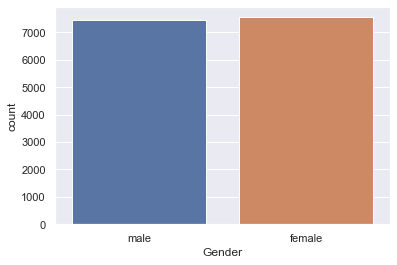

In [11]:
sns.countplot(calories['Gender'])

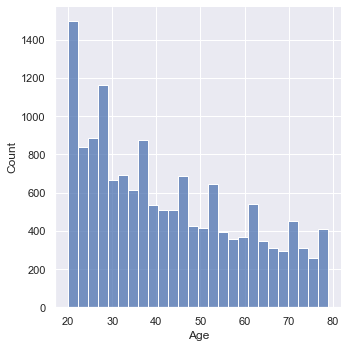

In [12]:
#finding the distribution of age column
sns.displot(calories['Age'])

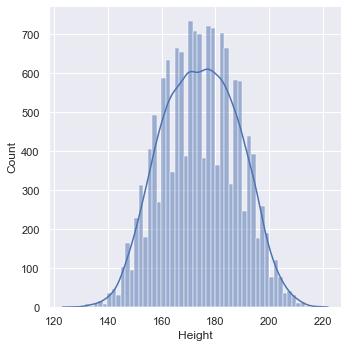

In [13]:
#finding the distribution of height column
sns.displot(calories['Height'],kde=True)

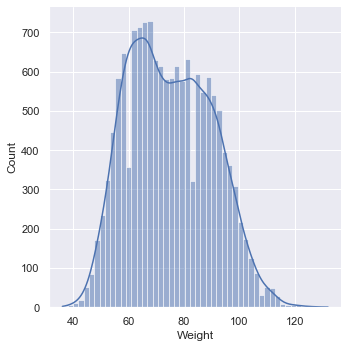

In [14]:
#finding the distribution of weight column
sns.displot(calories['Weight'],kde=True)

# Correlation between the data

# Correlation

Positive Correlation-->mean that if any column values is increase then another columns values increase(علاقة طردية)

Negative Correlation-->mean that if any column values is increase then another columns values decrease(علاقة عكسية)

<AxesSubplot:>

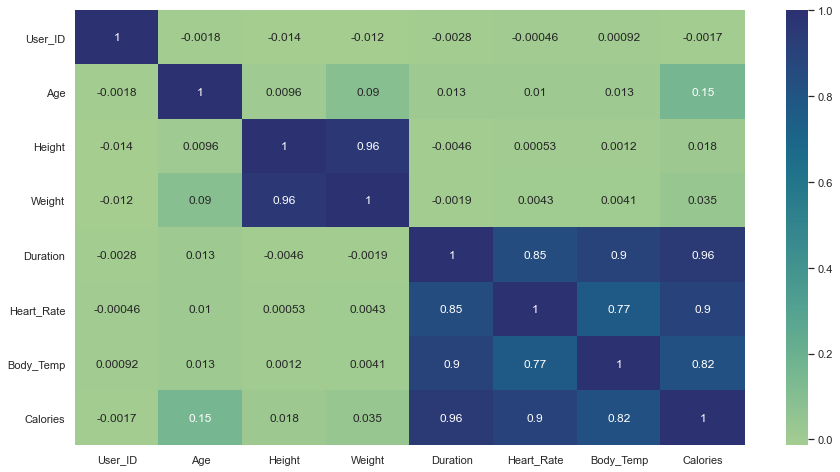

In [15]:
plt.figure(figsize=(15,8))
sns.heatmap(calories.corr(),annot=True,cmap='crest')

# Converting the text data to numerical values

In [23]:
calories.replace({"Gender":{'male':0,'female':1}}, inplace=True)

In [24]:
calories.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


# Separating features and Target

In [26]:
X = calories.drop(columns=['User_ID','Calories'], axis=1)
Y = calories['Calories']

In [27]:
X

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...
14995,1,20,193.0,86.0,11.0,92.0,40.4
14996,1,27,165.0,65.0,6.0,85.0,39.2
14997,1,43,159.0,58.0,16.0,90.0,40.1
14998,0,78,193.0,97.0,2.0,84.0,38.3


In [28]:
y

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64

# Splitting data into training and testing

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [30]:
X.shape,X_train.shape,X_test.shape

((15000, 7), (12000, 7), (3000, 7))

# Model Training

# XGboost Regressor

In [31]:
Model=XGBRegressor()

In [32]:
Model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

# Evaluation

# Prediction on Test Data

In [33]:
test_data_prediction=Model.predict(X_test)

In [34]:
test_data_prediction

array([ 1.8133228, 48.53386  , 42.936108 , ..., 89.71398  , 99.95195  ,
       90.92581  ], dtype=float32)

# Mean Absolute Error

In [36]:
mae=metrics.mean_absolute_error(y_test,test_data_prediction)

In [38]:
print('Mean Absolute Error =',mae)

Mean Absolute Error = 1.4875651899973552


# Making a predictive system

In [40]:
input_data=(0 ,68 ,190.0 ,94.0 ,29.0 ,105.0 ,40.8)

#changing the input_data to a numpy_array
input_data_as_numpy_array=np.asarray(input_data)

#reshape the array as we are predicting the one instance
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=Model.predict(input_data_reshaped)
print(prediction)

[230.83957]
